In [111]:
import pathlib as pl
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt





In [112]:
# file reference for dataframe
json_file_path = pl.Path(os.path.abspath('')).parent.resolve() / "data_files/words/included_words.json"

with open(json_file_path) as json_file:
    json_dict = json.load(json_file)

# creating dataframe
df_json = pd.DataFrame.from_dict({(word): json_dict[word]
                           for word in json_dict.keys()},
                       orient='index')


In [113]:
# filtering for fake and reliable and replacing NaN with [0,0]
df = df_json.copy()
df = df.filter(items=['fake', 'reliable'], axis=1)
df = df.rename(columns={'reliable':'real'})
df = df.applymap(lambda x: [0,0] if x is np.nan else x)

# unpacking tuples in columns fake and real
df['fake_art_freq'], df['fake_word_freq'] = zip(*df.fake)
df['real_art_freq'], df['real_word_freq'] = zip(*df.real)
df = df[df.real_word_freq != 0] # step 1: reduces from 14258 rows to 507 rows
df = df[df.fake_word_freq != 0] # step 2: reduces from 507 rows to 375 rows

df['fake_wa_ratio'] = round(df['fake_word_freq'] / df['fake_art_freq'],4)
df['real_wa_ratio'] = round(df['real_word_freq'] / df['real_art_freq'],4)

df['total_word_freq'] = df.fake_word_freq + df.real_word_freq

df = df.sort_values(by='total_word_freq', ascending=False)

#df["freq"] = round(df.iloc[:,0:9].sum(axis=1))
#df["freq_binary"] = df.fake + df.reliable
#df["ratio_binary"] = round(df.fake/df.reliable,4)
#df["score_binary"] = df.fake - df.reliable
#df = df.sort_values(by='freq_binary', ascending=False)
#df = df.sort_values(by='score_binary', ascending=False)

#print(f"Count of tokens when looking at all article types:          {len(df)}")
#df = df[df.freq_binary != 0]
#print(f"Count of tokens when looking only at 'fake' and 'reliable': {len(df)}")

In [114]:
df[:30]

,fake,real,fake_art_freq,fake_word_freq,real_art_freq,real_word_freq,fake_wa_ratio,real_wa_ratio,total_word_freq
the,"[153, 5381]","[2, 70]",153,5381,2,70,35.1699,35.0000,5451
of,"[149, 2965]","[3, 26]",149,2965,3,26,19.8993,8.6667,2991
and,"[149, 2852]","[3, 28]",149,2852,3,28,19.1409,9.3333,2880
to,"[146, 2808]","[2, 33]",146,2808,2,33,19.2329,16.5000,2841
a,"[135, 1877]","[3, 29]",135,1877,3,29,13.9037,9.6667,1906
in,"[145, 1758]","[2, 28]",145,1758,2,28,12.1241,14.0000,1786
is,"[135, 1345]","[2, 13]",135,1345,2,13,9.9630,6.5000,1358
that,"[115, 1237]","[2, 27]",115,1237,2,27,10.7565,13.5000,1264
for,"[133, 944]","[2, 15]",133,944,2,15,7.0977,7.5000,959
are,"[140, 766]","[2, 6]",140,766,2,6,5.4714,3.0000,772


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


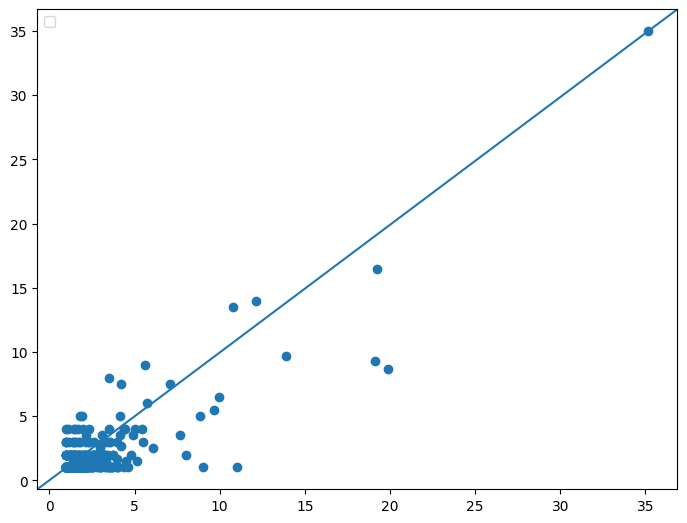

In [115]:
amount_ = 400
start_ = 0
end_ = start_ + amount_

ax = plt.figure().add_axes([0,0,1,1])
fake_ratio = df.fake_wa_ratio[start_:end_]
real_ratio = df.real_wa_ratio[start_:end_]
ax.scatter(fake_ratio, real_ratio)
ax.legend()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.show()


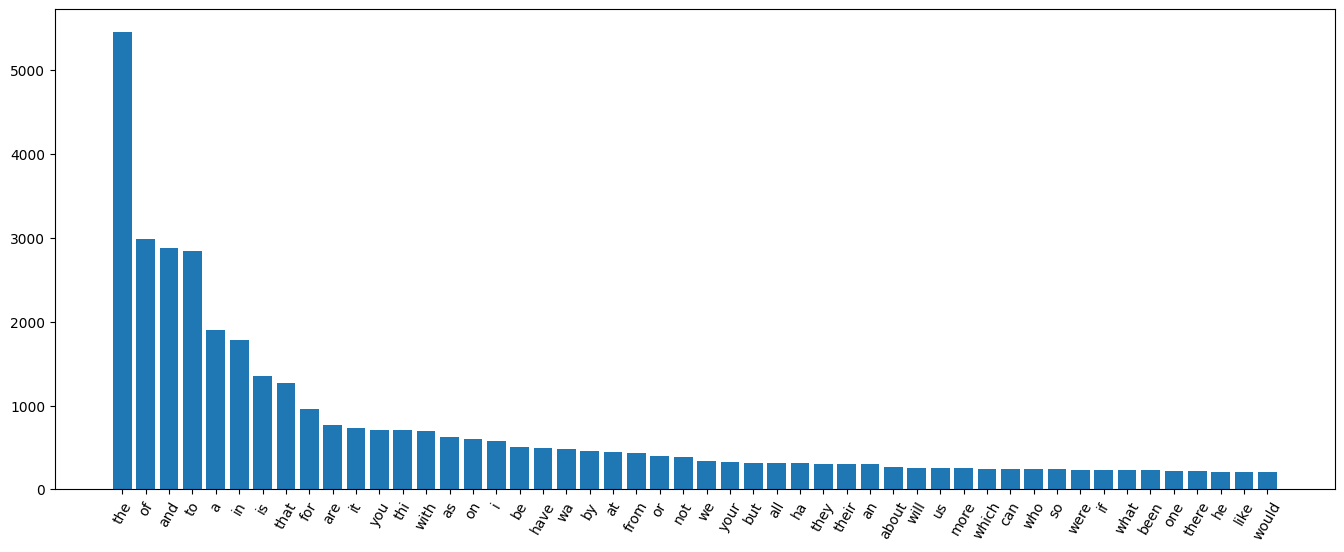

In [116]:
amount = 50
start = 0
end = start + amount

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
word = df.axes[0][start:end]
#score = df.[start:end]
freq = df.total_word_freq[start:end]
axes.bar(word, freq)
plt.xticks(rotation=60)
plt.show()